# Exploring Death Rates across regions in New Zealand

This notebook primarily explores the effect of income on death rates and life expectancy.

## Data Choices

Deaths are reported on a per regional basis.

deathRate is mathmatically calculated by:

$$ deathRate = \frac {deaths} {population} $$

## Methodology

In [1]:
"""
Get all required packages
"""

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from statsmodels.formula.api import ols
import plotly.plotly as py
import plotly.graph_objs as go

## Explore for Auckland Region

In [2]:
auckland = pd.read_csv('auckland.csv',thousands=',')
auckland.head()

,year,deathsMaori,deaths,population,deathRate,averageIncome,medianIncome
0,1998,501,7179,1169000,0.614115,1066,900
1,1999,465,6927,1184800,0.584656,1074,914
2,2000,462,7179,1201500,0.597503,1097,921
3,2001,453,6720,1218300,0.551588,1162,955
4,2002,459,7176,1255800,0.571429,1206,1034


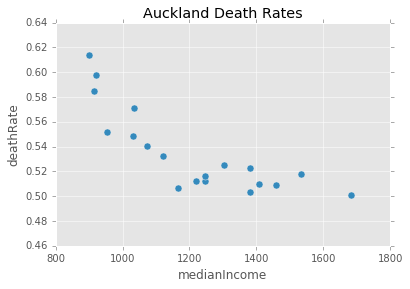

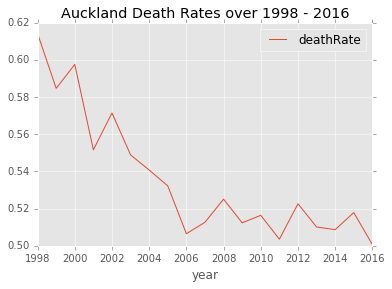

In [3]:
auckland.plot.scatter(x='medianIncome', y= 'deathRate', s=50, title='Auckland Death Rates')
auckland.plot(x='year', y='deathRate', title='Auckland Death Rates over 1998 - 2016')

In [4]:
year_16 = pd.read_csv('2016.csv', thousands=',')

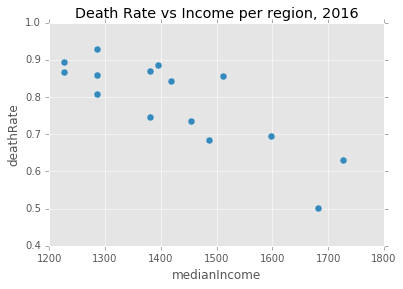

In [5]:
year_16.plot.scatter(x='medianIncome', y='deathRate', s=50, title='Death Rate vs Income per region, 2016')

In [6]:
year_16.corr()

,year,deathsMaori,deaths,population,deathRate,averageIncome,medianIncome,lifeExpectMen,lifeExpecWoman,Unnamed: 10,Unnamed: 11
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deathsMaori,NaN,1.000000,0.774049,0.730985,-0.533767,0.392888,0.399982,0.020677,0.077128,NaN,NaN
deaths,NaN,0.774049,1.000000,0.984351,-0.823141,0.686713,0.719279,0.342895,0.300216,NaN,NaN
population,NaN,0.730985,0.984351,1.000000,-0.841152,0.704234,0.704462,0.370725,0.319598,NaN,NaN
deathRate,NaN,-0.533767,-0.823141,-0.841152,1.000000,-0.841000,-0.825647,-0.253022,-0.157858,NaN,NaN
averageIncome,NaN,0.392888,0.686713,0.704234,-0.841000,1.000000,0.918695,0.319915,0.208808,NaN,NaN
medianIncome,NaN,0.399982,0.719279,0.704462,-0.825647,0.918695,1.000000,0.228444,0.120063,NaN,NaN
lifeExpectMen,NaN,0.020677,0.342895,0.370725,-0.253022,0.319915,0.228444,1.000000,0.979623,NaN,NaN
lifeExpecWoman,NaN,0.077128,0.300216,0.319598,-0.157858,0.208808,0.120063,0.979623,1.000000,NaN,NaN
Unnamed: 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Regression

From the graph above, the deathRate over income looks roughly linear. Let's now fit a simple linear regression following this equation:

$$ deathRate = \alpha + \beta * medianIncome + \varepsilon $$

In [7]:
simple_model = ols('deathRate ~ medianIncome', year_16).fit()
print simple_model.summary()

                            OLS Regression Results                            
Dep. Variable:              deathRate   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     29.98
Date:                Sun, 22 Jan 2017   Prob (F-statistic):           8.17e-05
Time:                        01:56:16   Log-Likelihood:                 21.382
No. Observations:                  16   AIC:                            -38.76
Df Residuals:                      14   BIC:                            -37.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        1.6725      0.162     10.339   

/opt/anaconda/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1557: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=16



In [9]:
"""
Produce Graph in Plotly ready for wesbite.

Graph Type: Scatter Plot
Data: Median Income, Death Rates
"""

trace = go.Scatter(
    x = year_16['medianIncome'],
    y = year_16['deathRate'],
    mode = 'markers'
)

graph_data = [trace]

py.plot(graph_data, filename='basic-scatter.html')

u'https://plot.ly/~jcallinicos/2'

In [10]:
year_16

,year,region,deathsMaori,deaths,population,deathRate,averageIncome,medianIncome,lifeExpectMen,lifeExpecWoman,Unnamed: 10,Unnamed: 11
0,2016,auckland,690,8082,1614400,0.500619,2017,1682,80.7,84.2,NaN,NaN
1,2016,bayOfPlenty,522,2475,293500,0.843271,1591,1419,79.4,83.4,NaN,NaN
2,2016,canterbury,177,4164,599900,0.694116,1789,1598,79.9,83.4,NaN,NaN
3,2016,gisborne,147,357,47800,0.746862,1639,1381,76.9,80.9,NaN,NaN
4,2016,hawkesBay,216,1404,161500,0.869350,1639,1381,79.0,82.7,NaN,NaN
5,2016,manawatu,246,2055,236900,0.867455,1395,1227,78.7,82.7,NaN,NaN
6,2016,marlborough,24,423,45500,0.929670,1560,1286,80.2,84.1,NaN,NaN
7,2016,nelson,9,435,50600,0.859684,1560,1286,80.2,83.8,NaN,NaN
8,2016,northland,420,1533,171400,0.894399,1370,1227,78.8,83.1,NaN,NaN
9,2016,otago,45,1614,219200,0.736314,1538,1454,79.6,83.3,NaN,NaN


## Explore Life Expectancy data

With the dataset, we have Life Expectancy, at birth based off 2014 figures. 

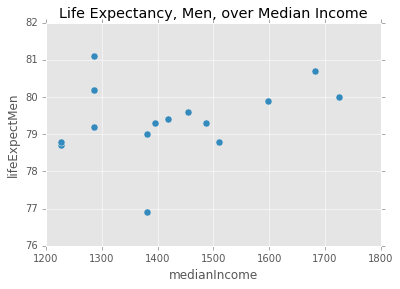

In [13]:
year_16.plot.scatter(x='medianIncome', y= 'lifeExpectMen', s=50, title='Life Expectancy, Men, over Median Income')

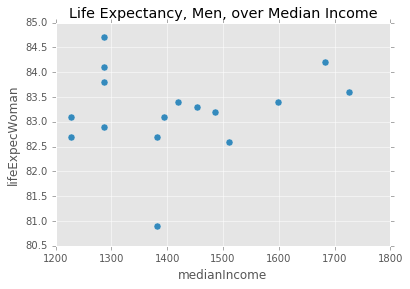

In [14]:
year_16.plot.scatter(x='medianIncome', y= 'lifeExpecWoman', s=50, title='Life Expectancy, Men, over Median Income')

0        auckland
1     bayOfPlenty
2      canterbury
3        gisborne
4       hawkesBay
5        manawatu
6     marlborough
7          nelson
8       northland
9           otago
10       southand
11       taranaki
12         tasman
13        waikato
14     wellington
15      westcoast
16            NaN
Name: region, dtype: object

In [25]:
"""
Produce Graph in Plotly ready for wesbite.

Graph Type: Bar chart
Data: Life Expectancy men and women, Median Income
"""

trace1 = go.Bar(
    x = year_16['region'],
    y = year_16['lifeExpectMen'],
    name = 'Life Expectancy Men'
)
trace2 = go.Bar(
    x = year_16['region'],
    y = year_16['lifeExpecWoman'],
    name = 'Life Expectancy Women'
)
"""
trace3 = go.Bar(
    x = year_16['region'],
    y = year_16['medianIncome'],
    name = 'Median Household Income',
    yaxis = 'Median Household Income ($)'
)
"""

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.plot(fig, filename='basic_bar.html')

u'https://plot.ly/~jcallinicos/4'